<a href="https://colab.research.google.com/github/natalfr17/An-lise-Estat-stica-de-Dados-e-Informa-es/blob/main/Prova_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Questão 1**

Esta questão aborda a aplicação prática de um problema de Ciência de Dados utilizando Regressão Linear. O objetivo é prever preços de imóveis com base em dados reais da região de King County, nos Estados Unidos. A base de dados utilizada é a Previsão de Vendas de Imóveis em King County (EUA). Siga os passos abaixo para desenvolver sua solução:

# **1. Análise Descritiva dos Dados (20%)**

• Realize uma análise inicial da base de dados.

• Inclua estatísticas descritivas (média, mediana, desvio padrão, etc.) e gráficos relevantes (distribuições, correlações, etc.).

In [27]:
# Importar principais bibliotecas
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats
from scipy import optimize
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression

In [28]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housesalesprediction


In [29]:
# Ler base

df = pd.read_csv(path + "/kc_house_data.csv")

In [30]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [32]:
# estatística descritiva
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [33]:
df['price']

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


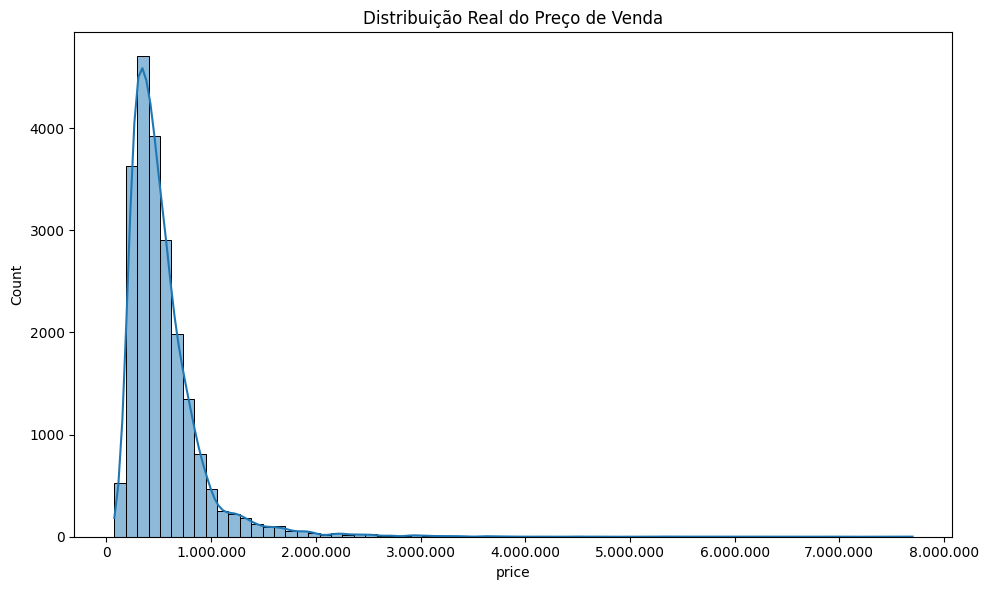

In [34]:
from matplotlib.ticker import FuncFormatter

# Distribuição do Preço de Venda
# Função para formatar o eixo X em dólares com separador de milhar
def format_dollar(x, _):
    return f'{int(x):,}'.replace(',', '.')

plt.figure(figsize=(10, 6))
sns.histplot(df["price"], bins=70, kde=True)
plt.title("Distribuição Real do Preço de Venda")
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_dollar))
plt.tight_layout()
plt.show()

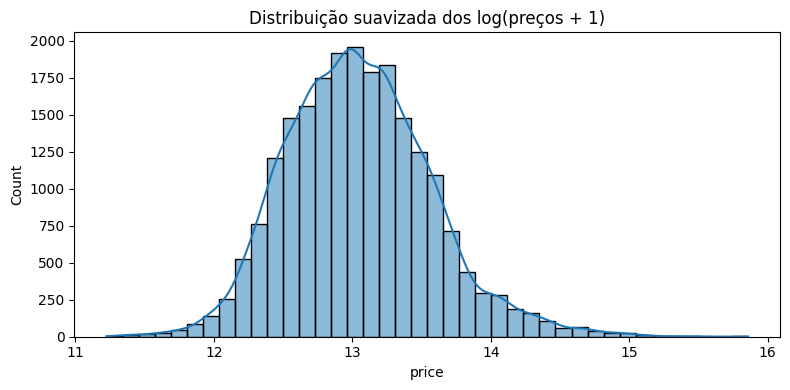

In [35]:
# Distribuição do log do Preço de Venda (log1p) para reduzir a assimetria e aproximar da normalidade

plt.figure(figsize=(8, 4))
sns.histplot(np.log1p(df["price"]), bins=40, kde=True)
plt.title("Distribuição suavizada dos log(preços + 1)")
plt.tight_layout()
plt.show()

In [36]:
# Filtrar base para considerar imóveis de até 2 milhões de dólares, a fim de minimizar outliers nesta variável

df = df[df["price"] <= 2000000]

In [37]:
df.shape

(21415, 21)

In [38]:
# Excluir colunas sem interesse

df_filtro = df.drop(['id','date'], axis = 1)

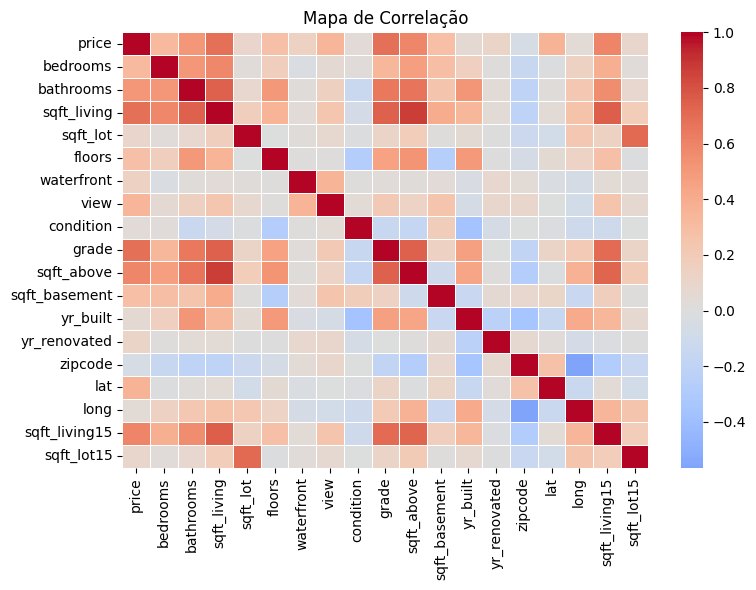

In [39]:

# Analise de Correlação das variáveis numéricas

# Matriz de correlação
corr = df_filtro.corr()
# Heatmap (mapa de calor) da correlação
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.4)
plt.title("Mapa de Correlação")
plt.tight_layout()
plt.show()

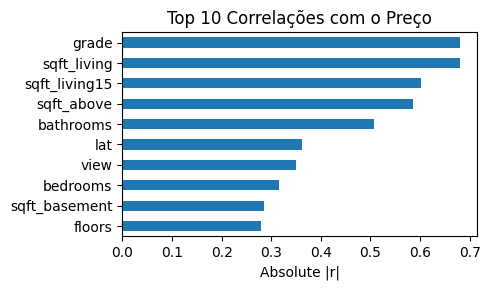

In [40]:
# Seleção das 10 variáveis mais correlacionadas com 'price'
top_corr = (corr["price"].drop("price").abs().sort_values(ascending=False).head(10))

# Gráfico de barras com as top 10 correlações
plt.figure(figsize=(5, 3))
top_corr.plot(kind="barh")
plt.title("Top 10 Correlações com o Preço")
plt.xlabel("Absolute |r|")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [41]:
# Contagem de valores Nulos, listando os mais expressivos
df.isna().sum().sort_values()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [42]:
# Construindo algumas variáveis que possam ajudar na interpretação da influencia das condições do imóvel no preço

# Idade do imóvel (ano de construção - ano de venda)
# Extrair ano da venda a partir da coluna 'date'
df['year_sold'] = df['date'].str[:4].astype(int)

# Idade do imóvel
df['house_age'] = df['year_sold'] - df['yr_built']

# Identificar o tamanho da área de lazer do imóvel
df['outdoor_space'] = df['sqft_lot'] - df['sqft_living']

# Quantos anos entre a última reforma e a venda, se não houve reforma, assume valor '0'
df['renovated_age'] = np.where(df['yr_renovated'] == 0,
                               0,
                               df['year_sold'] - df['yr_renovated'])

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,outdoor_space,renovated_age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,59,4470,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,2014,63,4672,23
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,2015,82,9230,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,2014,49,3040,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2015,28,6400,0


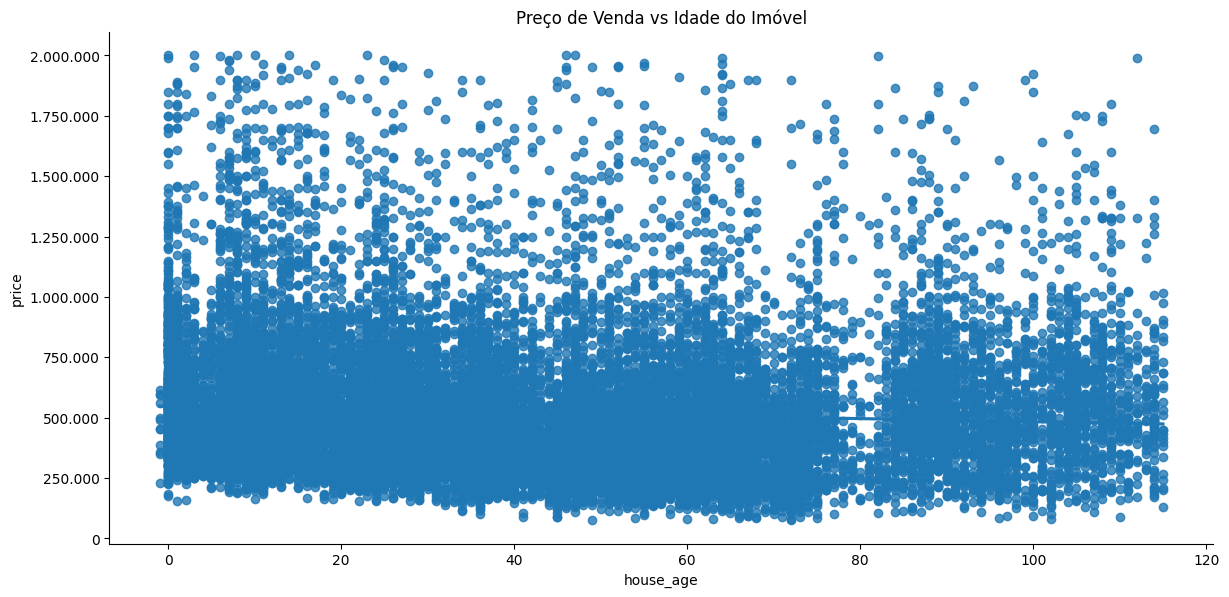

In [43]:
# Analisar visualmente relações lineares entre duas variáveis

# Função para formatar o eixo y em dólares com separador de milhar
def format_dollar(y, _):
    return f'{int(y):,}'.replace(',', '.')

sns.lmplot(x='house_age', y='price', data=df, aspect=2, height=6)
plt.title('Preço de Venda vs Idade do Imóvel')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollar))
plt.show()

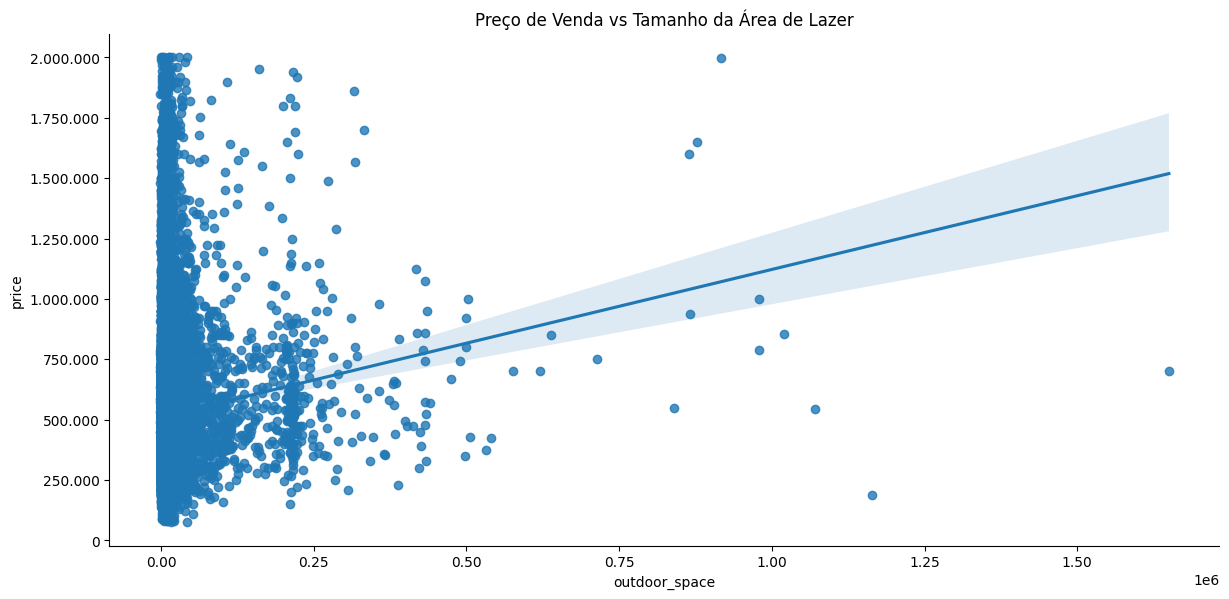

In [44]:
# Analisar visualmente relações lineares entre duas variáveis

# Função para formatar o eixo y em dólares com separador de milhar
def format_dollar(y, _):
    return f'{int(y):,}'.replace(',', '.')

sns.lmplot(x='outdoor_space', y='price', data=df, aspect=2, height=6)
plt.title('Preço de Venda vs Tamanho da Área de Lazer')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollar))
plt.show()

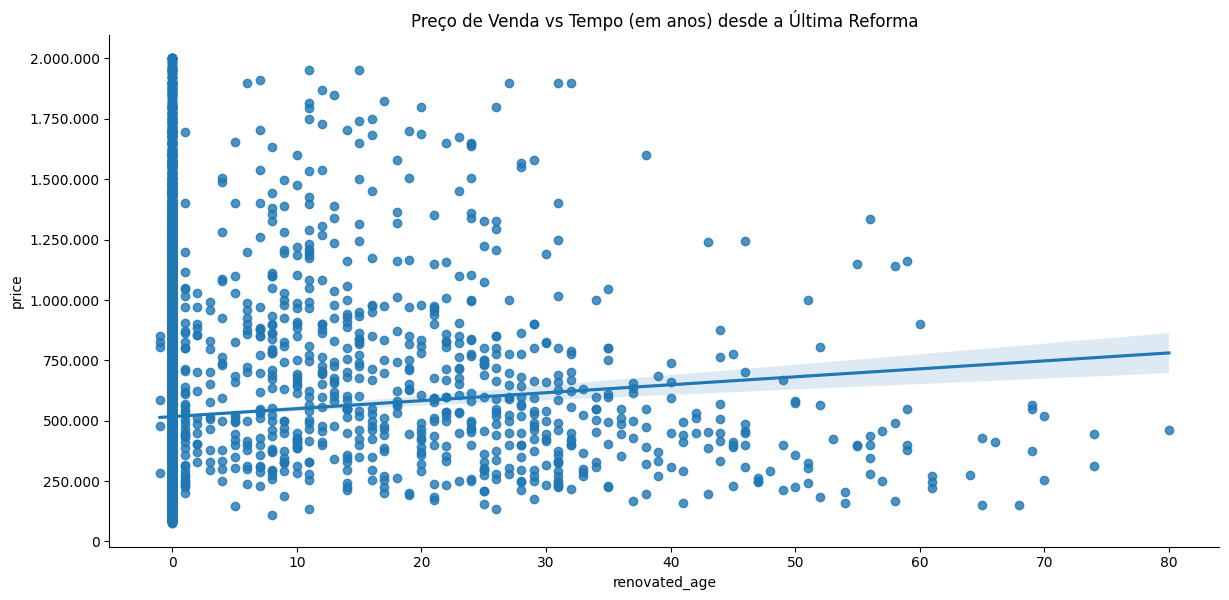

In [45]:
# Analisar visualmente relações lineares entre duas variáveis

# Função para formatar o eixo y em dólares com separador de milhar
def format_dollar(y, _):
    return f'{int(y):,}'.replace(',', '.')

sns.lmplot(x='renovated_age', y='price', data=df, aspect=2, height=6)
plt.title('Preço de Venda vs Tempo (em anos) desde a Última Reforma')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollar))
plt.show()

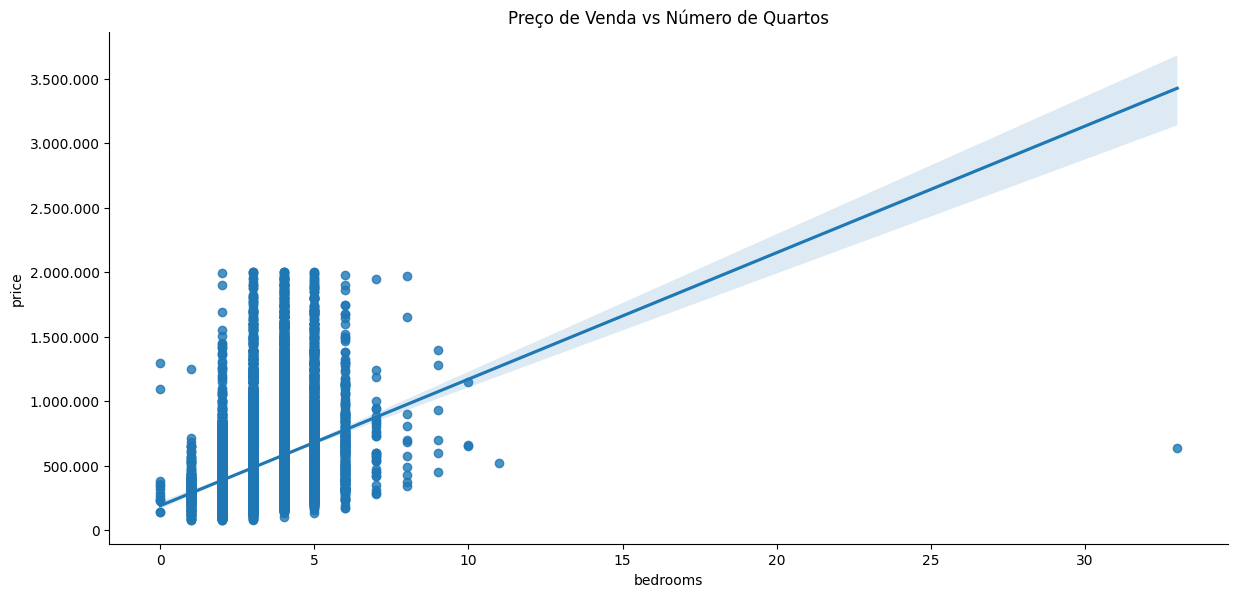

In [46]:
# Analisar visualmente relações lineares entre duas variáveis

# Função para formatar o eixo y em dólares com separador de milhar
def format_dollar(y, _):
    return f'{int(y):,}'.replace(',', '.')

sns.lmplot(x='bedrooms', y='price', data=df, aspect=2, height=6)
plt.title('Preço de Venda vs Número de Quartos')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollar))
plt.show()

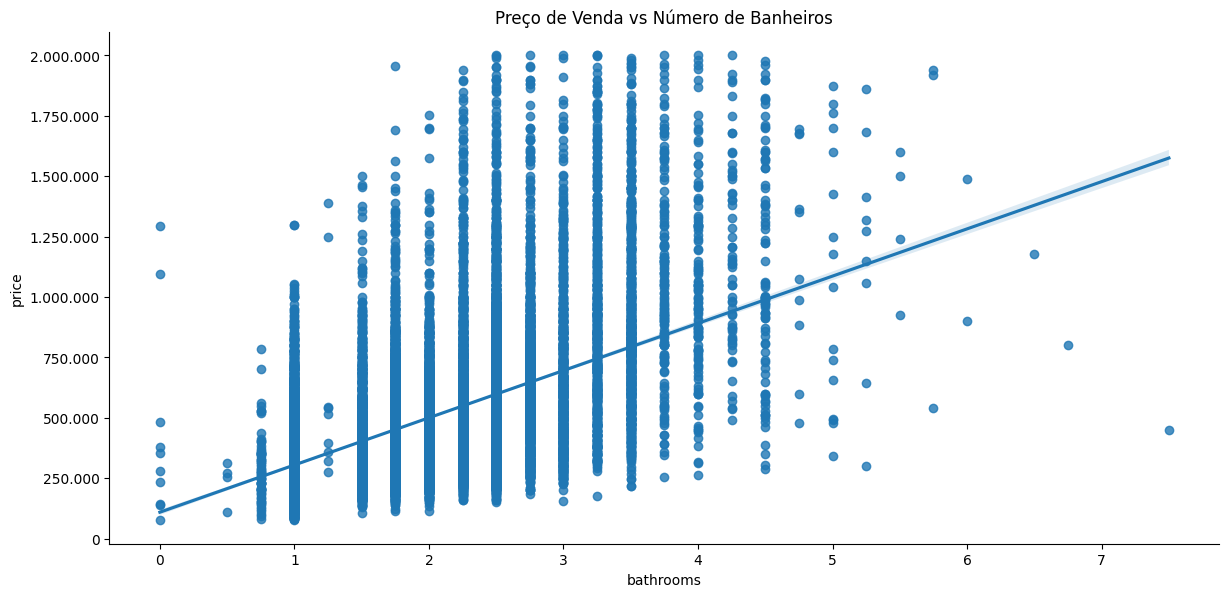

In [47]:
# Analisar visualmente relações lineares entre duas variáveis

# Função para formatar o eixo y em dólares com separador de milhar
def format_dollar(y, _):
    return f'{int(y):,}'.replace(',', '.')

sns.lmplot(x='bathrooms', y='price', data=df, aspect=2, height=6)
plt.title('Preço de Venda vs Número de Banheiros')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollar))
plt.show()

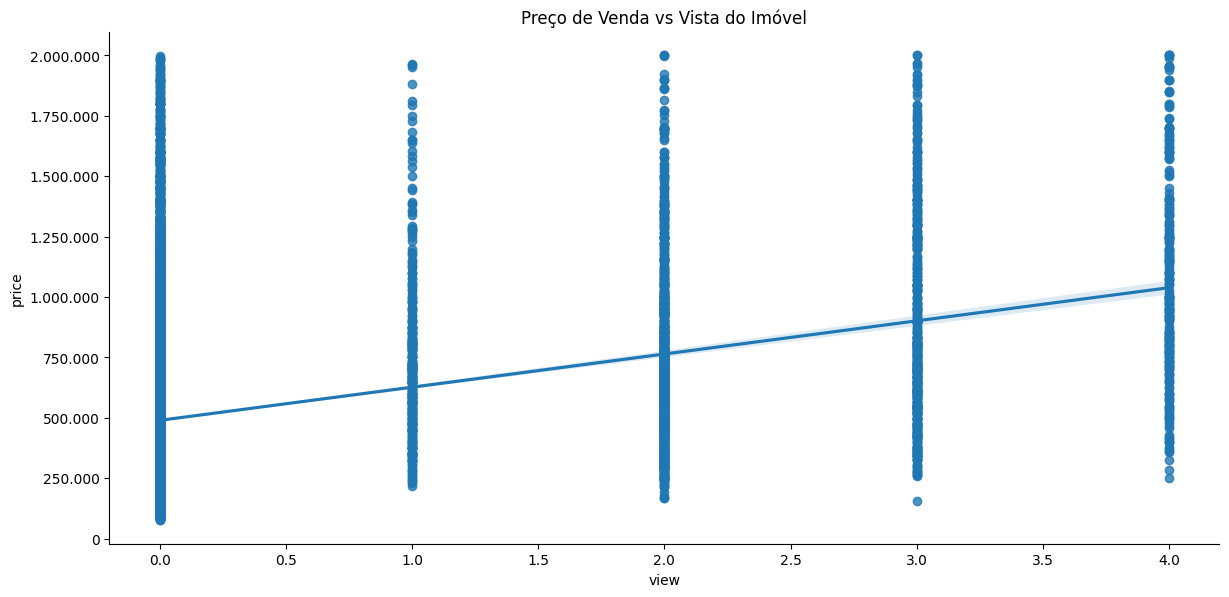

In [48]:
# Analisar visualmente relações lineares entre duas variáveis

# Função para formatar o eixo y em dólares com separador de milhar
def format_dollar(y, _):
    return f'{int(y):,}'.replace(',', '.')

sns.lmplot(x='view', y='price', data=df, aspect=2, height=6)
plt.title('Preço de Venda vs Vista do Imóvel')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollar))
plt.show()

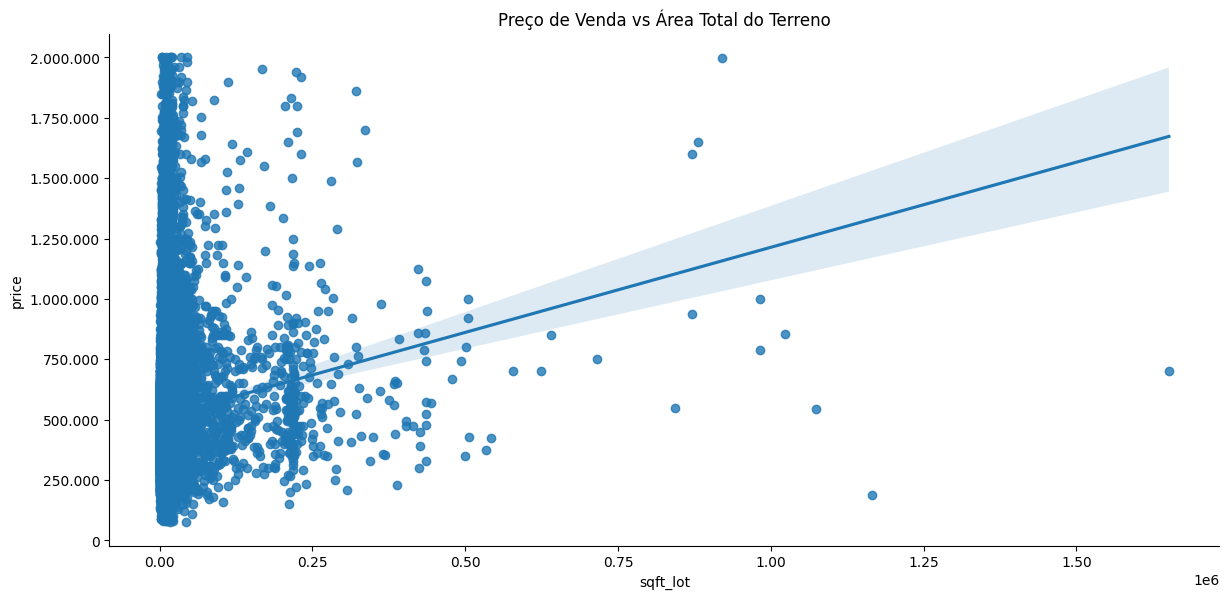

In [49]:
# Analisar visualmente relações lineares entre duas variáveis

# Função para formatar o eixo y em dólares com separador de milhar
def format_dollar(y, _):
    return f'{int(y):,}'.replace(',', '.')

sns.lmplot(x='sqft_lot', y='price', data=df, aspect=2, height=6)
plt.title('Preço de Venda vs Área Total do Terreno')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollar))
plt.show()

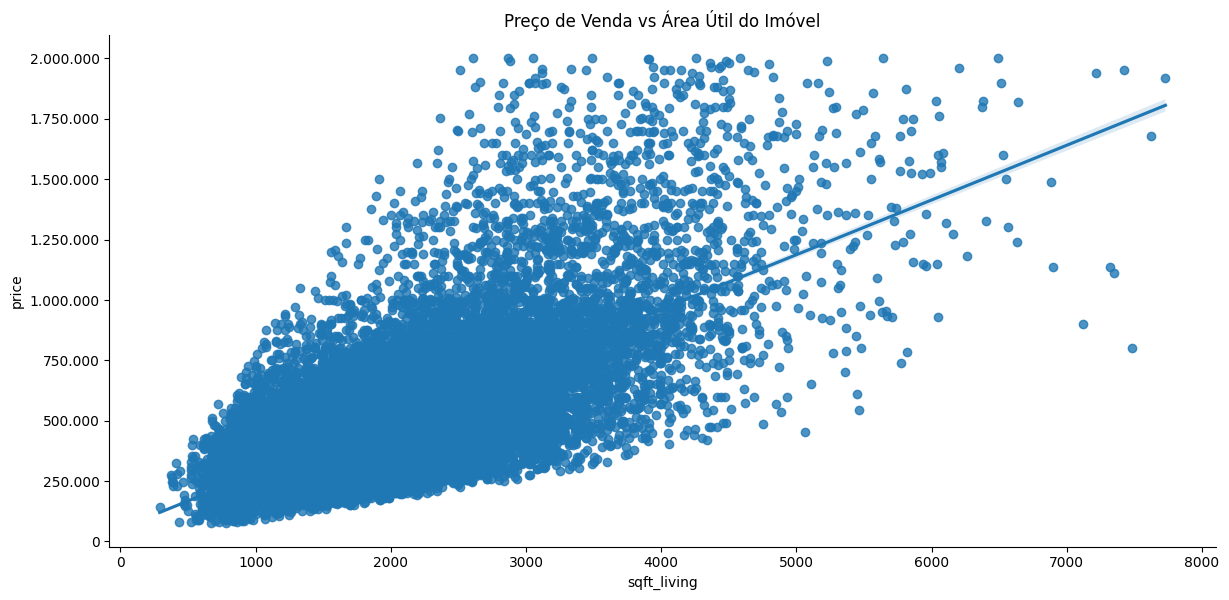

In [50]:
# Analisar visualmente relações lineares entre duas variáveis

# Função para formatar o eixo y em dólares com separador de milhar
def format_dollar(y, _):
    return f'{int(y):,}'.replace(',', '.')

sns.lmplot(x='sqft_living', y='price', data=df, aspect=2, height=6)
plt.title('Preço de Venda vs Área Útil do Imóvel')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollar))
plt.show()

**OBSERVAÇÕES**

As variáveis idade do imóvel e tempo desde a última reforma apresentação relações quase nulas com relação a variável preço, por esse motivo não serão consideradas na construção do modelo.

In [51]:

# Selecionando algumas variáveis

df_select = df[['price', 'bedrooms', 'bathrooms', 'view', 'sqft_lot', 'outdoor_space', 'sqft_living']]
df_select.head()

,price,bedrooms,bathrooms,view,sqft_lot,outdoor_space,sqft_living
0,221900.0,3,1.00,0,5650,4470,1180
1,538000.0,3,2.25,0,7242,4672,2570
2,180000.0,2,1.00,0,10000,9230,770
3,604000.0,4,3.00,0,5000,3040,1960
4,510000.0,3,2.00,0,8080,6400,1680


# **2. Construção do Modelo de Regressão Linear (30%)**

• Construa um modelo de Regressão Linear para prever os preços dos imóveis.

• Apresente os coeficientes do modelo, R2 e outras métricas de avaliaçãoo.

In [52]:
# Selecionar variáveis
X = df_select[['bedrooms', 'bathrooms', 'view', 'sqft_lot', 'outdoor_space', 'sqft_living']]
y = df_select['price']

# Transformar Neighborhood em dummies e garantir tipo numérico
dummies = pd.get_dummies(X['view'], prefix='view', drop_first=True).astype(float)

# Combinar numéricas com dummies
X_model = pd.concat([X[['bedrooms', 'bathrooms', 'sqft_lot', 'outdoor_space', 'sqft_living']], dummies], axis=1)

# Adicionar constante
X_model_constant = sm.add_constant(X_model).astype(float)

# Ajustar modelo
modelo = sm.OLS(y, X_model_constant, missing='drop').fit()

# Fazendo previsões com o modelo ajustado
predictions = modelo.predict(X_model_constant)
predictions

,0
0,306032.629087
1,634713.739983
2,245588.456297
3,476191.750533
4,431449.496430
...,...
21608,405993.937547
21609,547703.760622
21610,299921.016163
21611,421455.814353


In [53]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     2778.
Date:                Mon, 21 Jul 2025   Prob (F-statistic):               0.00
Time:                        01:01:43   Log-Likelihood:            -2.9195e+05
No. Observations:               21415   AIC:                         5.839e+05
Df Residuals:                   21406   BIC:                         5.840e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.258e+05   5472.478     22.992

# **3. Interpretação dos Resultados (10%)**

• Explique os resultados obtidos pelo modelo, destacando o impacto de cada
variável nas previsões e explicações do fenômeno.

• Verifique se os pressupostos da Regressão Linear (linearidade, homocedasticidade, normalidade dos resíduos, etc.) foram atendidos

In [54]:
# Calculando VIF para cada variável

exog_data = modelo.model.data.exog

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(exog_data, i) for i in range(exog_data.shape[1])]
vif["features"] = modelo.model.exog_names

print(vif)

   VIF Factor       features
0   15.774884          const
1    1.561841       bedrooms
2    2.277606      bathrooms
3         inf       sqft_lot
4         inf  outdoor_space
5         inf    sqft_living
6    1.007601         view_1
7    1.026372         view_2
8    1.034904         view_3
9    1.019977         view_4


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


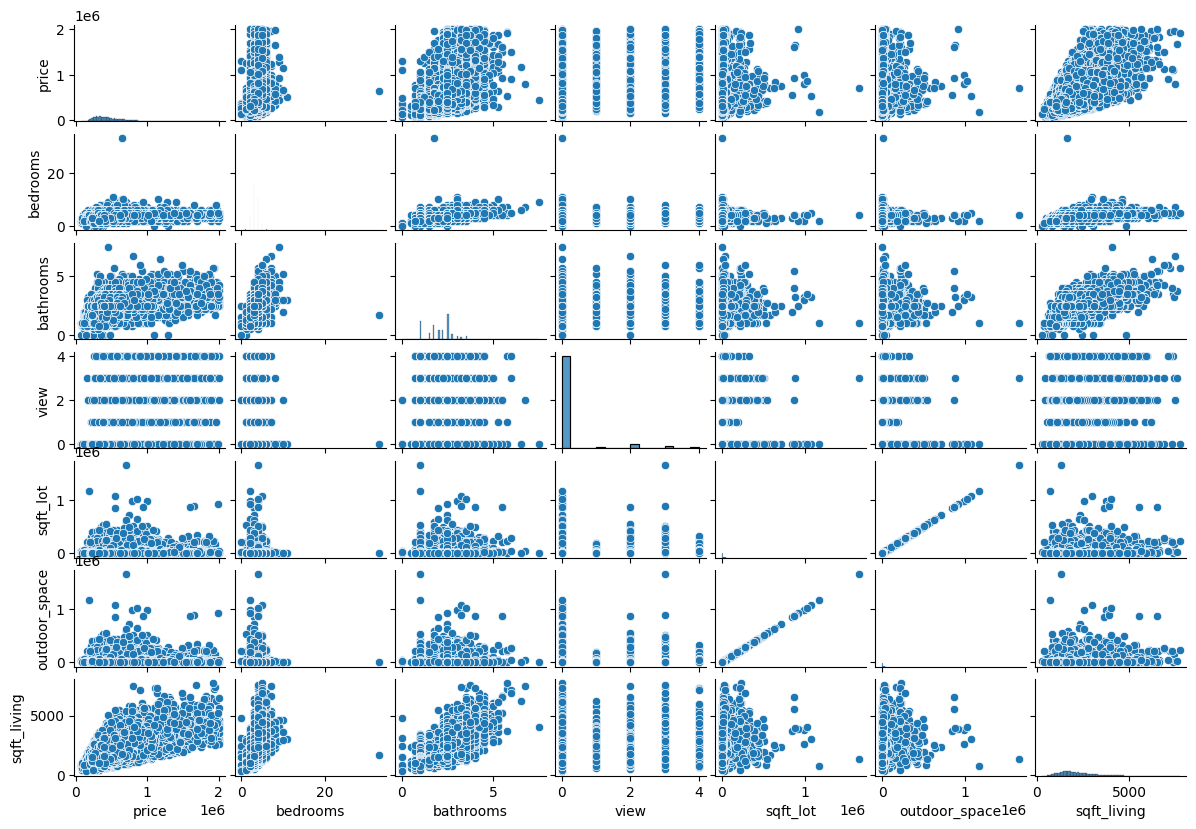

In [55]:
figure = sns.pairplot(df_select)
figure.fig.set_size_inches(12,8)

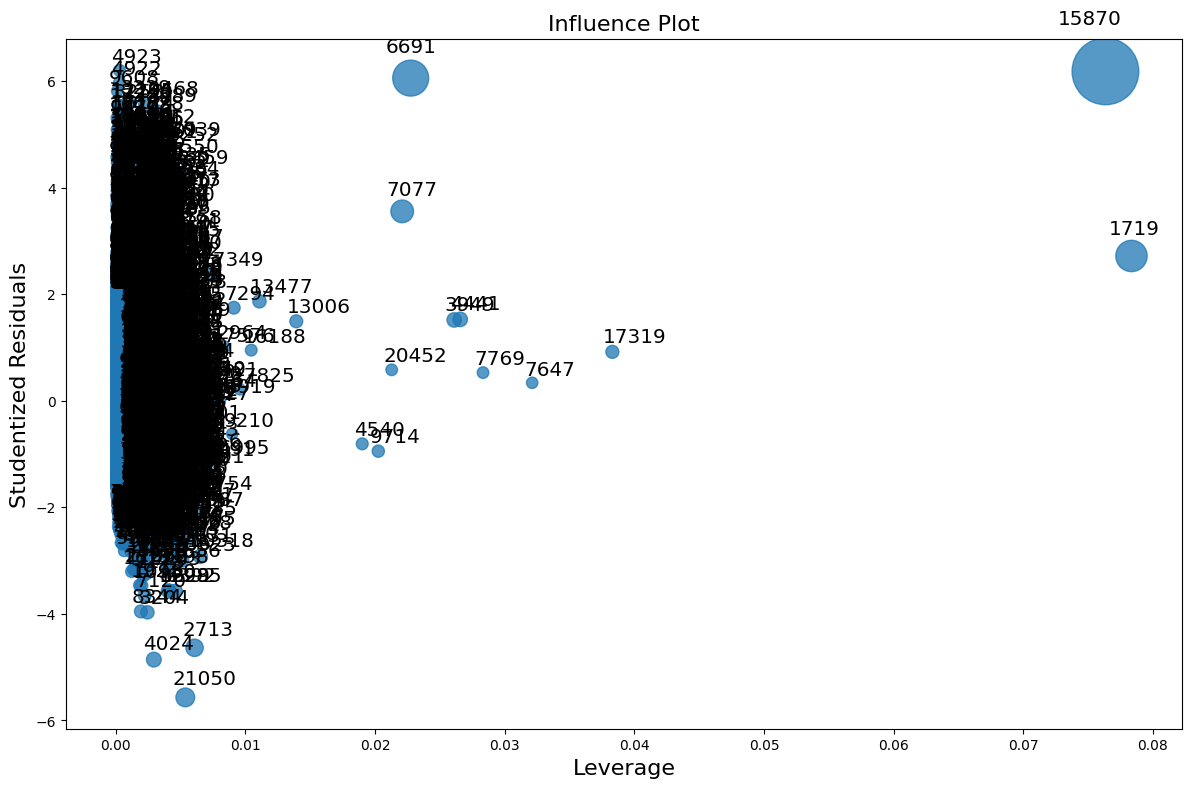

In [56]:
fig = sm.graphics.influence_plot(modelo, criterion="cooks")
fig.set_size_inches(12, 8)
plt.tight_layout(pad=1.0)

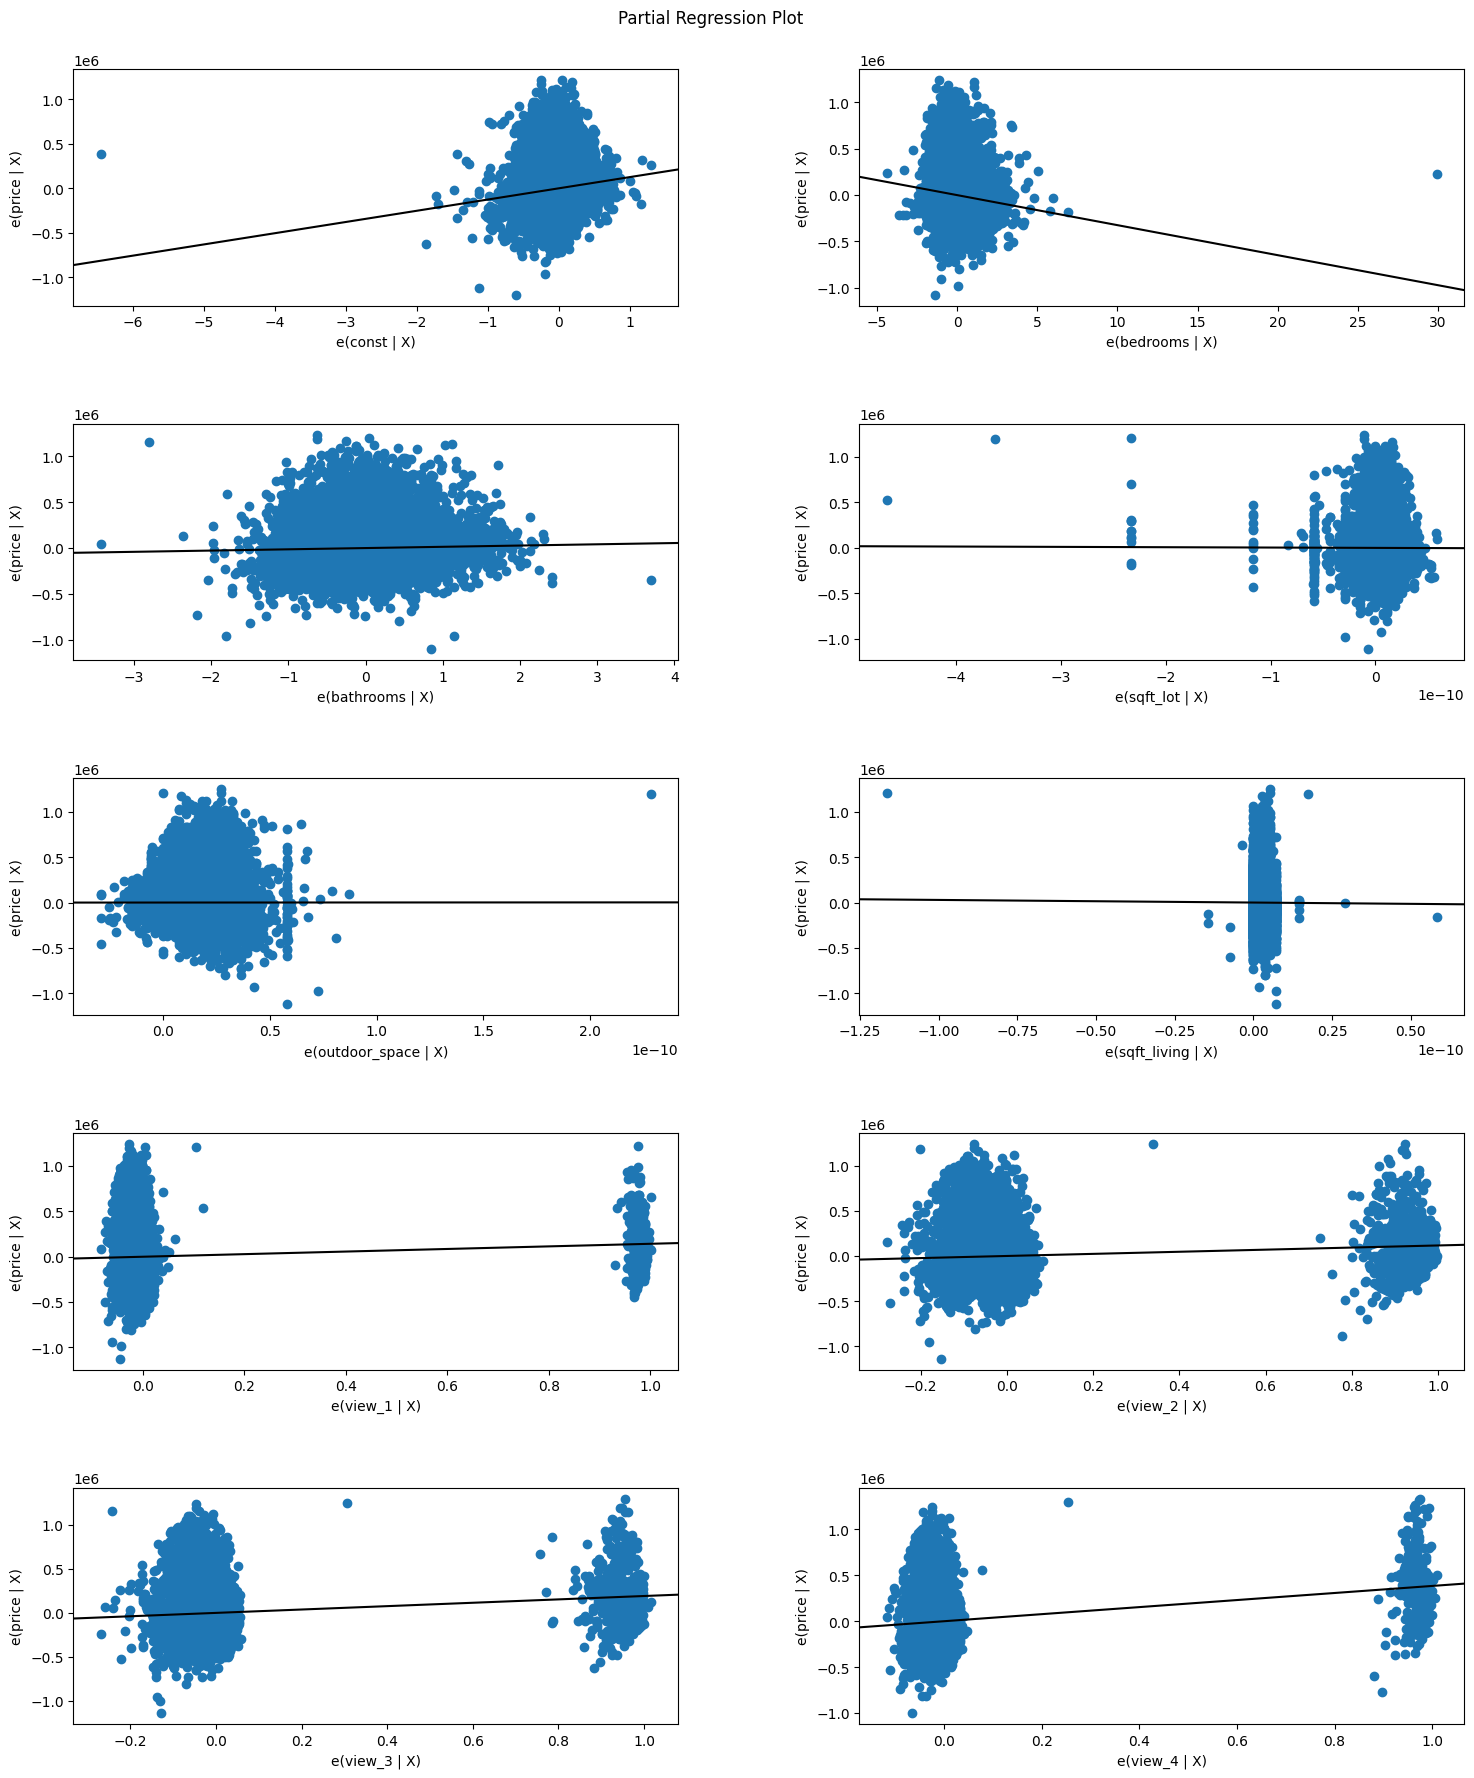

In [57]:
# Gráfico para diagnosticar a relação entre cada variável explicativa e a variável alvo

# Número de variáveis explicativas no modelo
n_variaveis = len(modelo.model.exog_names)

# Calcular número de linhas com base em 2 colunas por linha
n_linhas = math.ceil(n_variaveis / 2)

# Altura estimada: 4 polegadas por linha (ajustável)
altura_total = 4 * n_linhas

# Gerar o gráfico
fig = sm.graphics.plot_partregress_grid(modelo)
#fig.tight_layout(pad=2.0)         # Aumentar a margem entre subplots
fig.set_size_inches(16, altura_total)  # Aumentar o tamanho da figura

# Manualmente ajustar o layout
fig.subplots_adjust(hspace=0.5, wspace=0.3) # Adjust horizontal and vertical spacing as needed

In [58]:
name = ['Multiplicador de Lagrange - Teste Breusch e Pagan de Heterocedasticidade ',
        'p-value', 'f-value', 'f: p-value']
test = sm.stats.het_breuschpagan(modelo.resid, modelo.model.exog)
lzip(name, test)

[('Multiplicador de Lagrange - Teste Breusch e Pagan de Heterocedasticidade ',
  np.float64(2219.856400769843)),
 ('p-value', np.float64(0.0)),
 ('f-value', np.float64(309.44185093765753)),
 ('f: p-value', np.float64(0.0))]

1.   RESULTADO


2.   VERIFICAÇÃO DE PRESSUPOSTOS




# **4. Ajustes no Modelo (30%)**

• Identifique possíveis problemas nos pressupostos do modelo.

• Apresente soluções para corrigir esses problemas, como transformações de
variáveis ou ajustes no modelo.

• Reavalie o desempenho do modelo ajustado.

MODELO ROBUSTO



In [59]:
# Definindo a variável dependente
y = df['price']

# Preparando a matriz de características com as variáveis independentes
# Concatenando as novas variáveis dummy com as variáveis independentes originais
x = pd.concat([X[['bedrooms', 'bathrooms', 'sqft_lot', 'outdoor_space', 'sqft_living']], dummies], axis=1)


# Ajustando o modelo OLS
modelo_robusto = sm.OLS(y, x, missing='drop').fit(cov_type='HC0')

# Fazendo previsões com o modelo ajustado
predictions = modelo_robusto.predict(x)

In [60]:
modelo_robusto.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 8
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                          1.550e+04
Date:                Mon, 21 Jul 2025   Prob (F-statistic):                        0.00
Time:                        01:09:08   Log-Likelihood:                     -2.9221e+05
No. Observations:               21415   AIC:                                  5.844e+05
Df Residuals:                   21407   BIC:                                  5.845e+05
Df Model:                           8                                                  
Covariance Type:                  HC0                                                  
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -4594.5052   1715.302     -2.679      0.007   -7956.435   -1232.575
bathrooms      3.277e+04   2895.890     11.317      0.000    2.71e+04    3.84e+04
sqft_lot         72.0205      1.139     63.214      0.000      69.787      74.253
outdoor_space   -72.1615      1.148    -62.835      0.000     -74.412     -69.911
sqft_living     144.1820      2.287     63.040      0.000     139.699     148.665
view_1         1.468e+05   1.53e+04      9.570      0.000    1.17e+05    1.77e+05
view_2          1.18e+05   8976.083     13.141      0.000       1e+05    1.36e+05
view_3         1.884e+05    1.5e+04     12.579      0.000    1.59e+05    2.18e+05
view_4         3.862e+05   2.32e+04     16.652      0.000    3.41e+05    4.32e+05
==============================================================================
Omnibus:                     3667.220   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10618.843
Skew:                           0.908   Prob(JB):                         0.00
Kurtosis:                       5.933   Cond. No.                     8.69e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC0)
[3] The smallest eigenvalue is 1.08e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
#modelo com ajuste de escala das vaiáveis

# Definindo a variável dependente em escala log, evitando valores zero ou negativos
y = np.log(df['price'] + 1)

# Aplicando log nas variáveis independentes contínuas, evitando valores zero ou negativos
x_continuas = np.log(df[['bedrooms', 'bathrooms', 'sqft_lot', 'outdoor_space', 'sqft_living']].replace(0, 1))

# Concatenando as variáveis independentes log-transformadas com as variáveis dummy
x = pd.concat([x_continuas, dummies], axis=1)

# Ajustando o modelo OLS sem a constante e com variância robusta (HC0)
modelo_robusto = sm.OLS(y, x, missing='drop').fit(cov_type='HC0')

# Fazendo previsões com o modelo ajustado
predictions = modelo_robusto.predict(x)

# Exibindo o resumo do modelo
print(modelo_robusto.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.163e+06
Date:                Mon, 21 Jul 2025   Prob (F-statistic):                        0.00
Time:                        01:09:08   Log-Likelihood:                         -12083.
No. Observations:               20627   AIC:                                  2.418e+04
Df Residuals:                   20618   BIC:                                  2.425e+04
Df Model:                           9                                                  
Covariance Type:                  HC0                                                  
                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


# **5. Tomada de Decisão (10%)**

• Com base no modelo final, explique como os resultados podem ser aplicados
em um contexto de negócios.

• Forneça exemplos de decisões estratégicas que poderiam ser tomadas com
base nas previsões.